In [1]:
from deck import BlackjackShoe
from dealer import Dealer
from round import BlackjackRound
from hand import Hand
from game import Game, BLACKJACKSIXTOFIVEPAYOUT, BLACKJACKTHREETOTWOPAYOUT
from strategies.strategy import StrategyTable
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
rounds = []
games = []
num_players = 1
num_games = 1
bet_size = 100
num_rounds = 1000000
for _ in range(num_games):
    game = Game(8, num_players=num_players, strategy=StrategyTable["MULTIDECK"], hit_on_soft_17=True, blackjack_payout=BLACKJACKTHREETOTWOPAYOUT, min_bet=bet_size, denominations=10, player_bankroll=0, resplit_till=4)
    round_data = game.play(num_rounds, print_cards=False)
    rounds.extend(round_data)
    games.append(game.house_bankroll)

sum = 0
wins = 0
losses = 0
pushes = 0
for g in rounds:
    if g > 0:
        wins += 1
    elif g < 0:
        losses += 1
    else:
        pushes += 1
    sum += g
print(sum)

print(sum / num_players / num_games / num_rounds)
print(f"Wins: {wins / num_rounds}, Losses: {losses / num_rounds}, Pushes: {pushes / num_rounds}")
print()

=== Results After 1000000 Games ===
Player 0: $-496400
House Bankroll: $496400
Cards Left: 178
496400
0.4964
Wins: 0.479728, Losses: 0.432825, Pushes: 0.087447



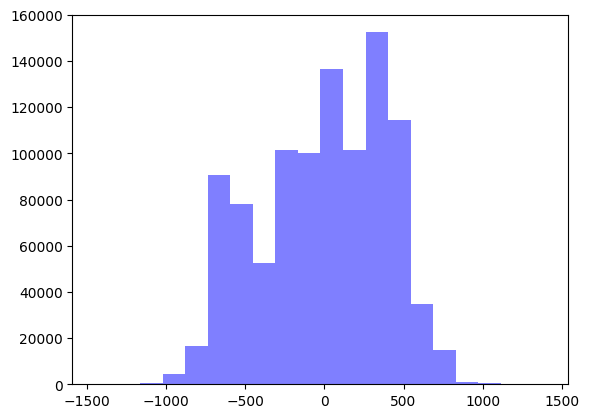

In [7]:
plt.hist(rounds, bins=20, facecolor="blue", alpha=0.5)

plt.show()

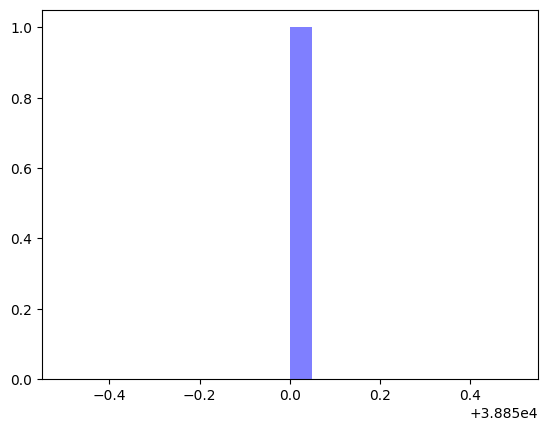

In [4]:
plt.hist(games, bins=20, facecolor="blue", alpha=0.5)
# sns.kdeplot(games)

plt.show()

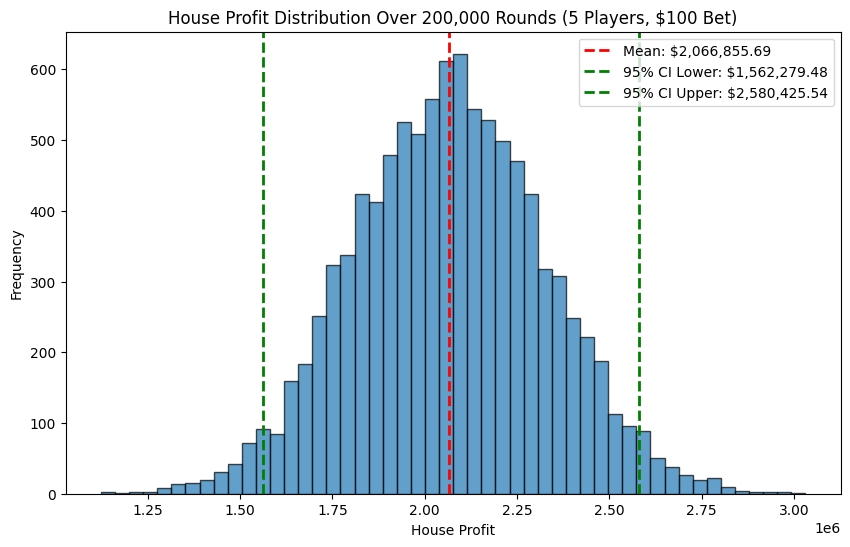

Expected House Profit: $2,066,855.69
95% Confidence Interval: ($1,562,279.48, $2,580,425.54)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_players = 5
bet_per_player = 100  # Bet per player per round
house_edge = 0.0041349  # House edge (0.41349%)
num_rounds = 1000000
num_simulations = 10000    # Number of simulations to run

# Calculate total bet per round
total_bet_per_round = num_players * bet_per_player

# Simulate house profit
np.random.seed(42)  # For reproducibility
house_profits = []

for _ in range(num_simulations):
    # Simulate player outcomes (normal distribution approximation)
    # Standard deviation per player per round is approximately 1.15 * bet size
    sd_per_player = 1.15 * bet_per_player
    sd_per_round = np.sqrt(num_players) * sd_per_player

    # Simulate total player loss per round (house profit = total loss * house edge)
    total_loss_per_round = np.random.normal(
        loc=total_bet_per_round * house_edge,  # Mean loss per round
        scale=sd_per_round,  # Standard deviation of loss per round
        size=num_rounds
    )

    # Total house profit over all rounds
    total_house_profit = np.sum(total_loss_per_round)
    house_profits.append(total_house_profit)

# Convert to numpy array for easier calculations
house_profits = np.array(house_profits)

# Calculate mean and 95% confidence interval
mean_house_profit = np.mean(house_profits)
ci_lower = np.percentile(house_profits, 2.5)
ci_upper = np.percentile(house_profits, 97.5)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(house_profits, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(mean_house_profit, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_house_profit:,.2f}')
plt.axvline(ci_lower, color='green', linestyle='dashed', linewidth=2, label=f'95% CI Lower: ${ci_lower:,.2f}')
plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=2, label=f'95% CI Upper: ${ci_upper:,.2f}')
plt.title('House Profit Distribution Over 200,000 Rounds (5 Players, $100 Bet)')
plt.xlabel('House Profit')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print(f"Expected House Profit: ${mean_house_profit:,.2f}")
print(f"95% Confidence Interval: (${ci_lower:,.2f}, ${ci_upper:,.2f})")


In [5]:
import numpy as np

# Example: house_wins is an array of house profit per round from your simulation.
# For illustration, let's assume you already simulated these values.
# house_wins = np.array([...])
house_wins = np.array(rounds)
n = len(house_wins)
sample_mean = np.mean(house_wins)
sample_std = np.std(house_wins, ddof=1)


In [6]:
from scipy import stats

# Hypothesized mean (e.g., house edge is $2.50 per round)
mu0 = 0.19651 * 1

# Calculate the t statistic
t_statistic = (sample_mean - mu0) / (sample_std / np.sqrt(n))

# Degrees of freedom is n-1
df = n - 1

# Two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=df))

print(f"Sample Mean: {sample_mean:.4f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")


Sample Mean: 0.0761
t-statistic: -1.0460
p-value: 0.2956
